# **Tercera entrega del proyecto final**

Grupo 8: Noelia Aparicio, Melina Schamberger y Natasha Siderman

**Contexto**

- Una empresa de medicina prepaga provee de forma gratuita las **drogas A, B, C, X e Y** para sus afiliados.

- Cada una de esas drogas se receta para distintos tipos de padecimientos y tienen distintos costos para la empresa.

- La empresa quiere entender **para qué padecimiento los médicos recetan cada droga**, a fin de estimar costos a la hora de aceptar a un nuevo afiliado.

- Cuenta con datos de 200 afiliados a quienes se les recetaron alguna de las 5 drogas.

- Los datos de los que dispone de esos pacientes son: *edad, sexo, presión arterial, colesterol, proporción de sodio sobre potasio y droga recetada*.


## 1. Análisis exploratorio

Con el análisis exploratorio del set de datos se buscará indagar la distribución de las variables y la relación que pueda existir entre las mismas. 

### 0. Carga de librerías

In [ ]:
import numpy as np 
import pandas as pd
import requests
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

### 1. Carga de datos

In [ ]:
df = pd.read_csv('drug200.csv')

### 2. Aproximación a los datos

Para comenzar, visualizamos las primeras filas del dataset:

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Luego analizamos su estructura:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 200 filas, y 6 columnas


Como indica el print, el dataset contiene 200 filas y 6 columnas: 

**Age** --> Tipo número entero

**Sex** --> Tipo objeto

**BP** --> Tipo objeto

**Cholesterol** --> Tipo objeto

**Na_to_K** --> Tipo número decimal

**Drug **--> Tipo objeto



### 3. Missing values

Chequeamos que el df no tenga valores perdidos: 

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### 4. Análisis univariado

En principio, realizaremos un primer análisis exploratorio con estadísticos descriptivos de las dos **variables numéricas**:

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


De las métricas obtenidas, se desprende que: 

**Edad**

- La media de edad de los pacientes es 44.

- El desvío estandar es de 16,5.

- La edad mínima es 15.

- La edad máxima es 74.

- El corte de edad del primer cuartil es 15.

- El corte de edad del segundo cuartil es 45.

- El corte de edad del tercer cuartil es 58.

**Proporción de sodio a potasio**

- El promedio de la proporción de sodio a potasio es 16.

- El desvío estandar es de 7,2.

- La proporción mínima es de 6,3.

- La proporción máxima es de 38,2.

- El corte de la proporción del primer cuartil es 10,4.

- El corte de la proporción del segundo cuartil es 13,9.

- El corte de la proporción del tercer cuartil es 19,4.

Se observa la distribución de las edades mediante un gráfico: 

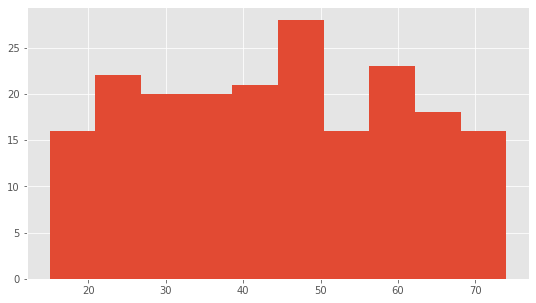

In [ ]:
plt.figure(figsize = (9,5))
df['Age'].hist();

Se observa la distribución de la proporción de sodio visualmente:

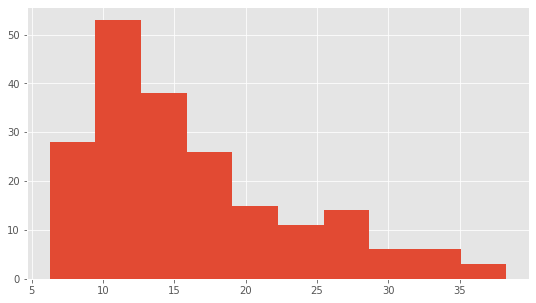

In [ ]:
plt.figure(figsize = (9,5))
df['Na_to_K'].hist();

Seguidamente, pasamos a explorar las **variables categóricas**: 

En principio, indagamos la composición de la muestra según **sexo**: 

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

La muestra cuenta con 104 pacientes masculinos y 96 pacuentes femeninas.

Graficamos la distribución de sexo en la muestra:


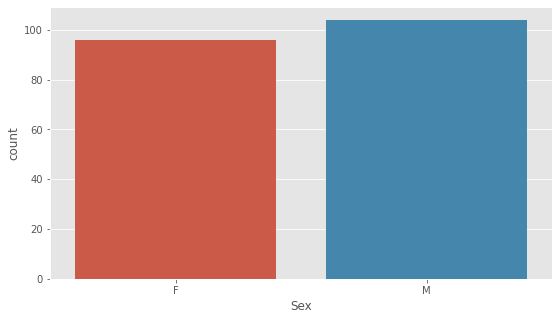

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

Podemos observar que la presencia de hombres es mayor, respecto a la de mujeres. 

Seguidamente, analizamos la composición de la muestra según **presión arterial**: 

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

La mayoría de los pacientes tienen presión arterial alta, seguido de baja y la minoría, normal.

Graficamos la distribución de presión arterial en la muestra:


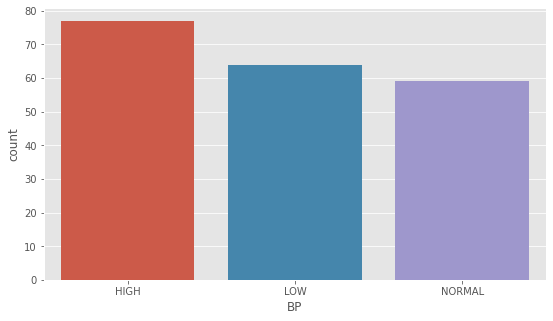

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.BP)
plt.show()

Avanzando con el análisis univariado, analizamos la composición de la muestra según **colesterol**:

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

La mayoría de los pacientes tiene colesterol alto.

Graficamos la distribuciónb de colesterol en la muestra:

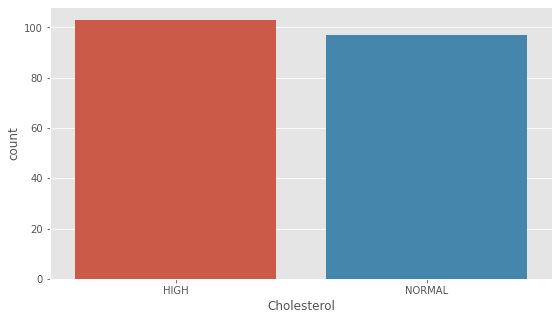

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.Cholesterol)
plt.show()

Finalmente, analizamos la composición de la muestra según nuestra variable de interés (variable dependiente), **droga recetada**: 

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

La mayoría de los pacientes recibieron la droga Y, seguido por la X, luego por la A y la minoría, la C y la B.

Graficamos la distribución de droga recetada en la muestra:


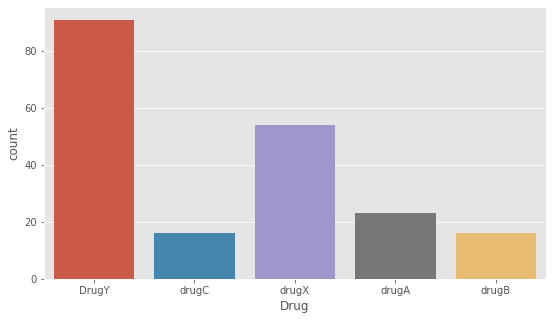

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.Drug)
plt.show()


## 2. Análisis bivariado

Dado que nuestra variable dependiente es droga, indagaremos su relación con cada una de las demás variables.

### Edad y droga recetada: 

Primeramente, analizamos la relación entre la variable **edad** y la variable **droga**: 

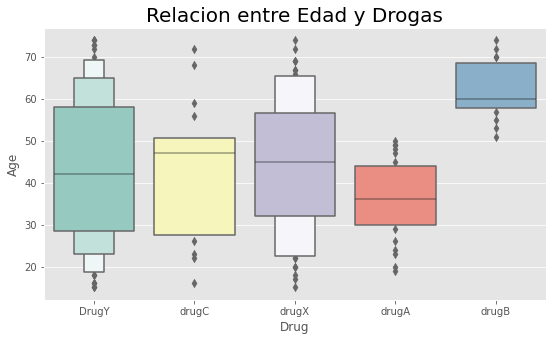

In [ ]:
plt.figure(figsize=(9,5))
sns.boxenplot(x = df['Drug'], y = df['Age'], palette = 'Set3')
plt.title('Relacion entre Edad y Drogas', fontsize = 20, fontweight = 30)
plt.show()

A partir del gráfico podemos asumir que a pacientes mayores de 60 años se les receta, por lo general, la droga B.

También, que la droga A se receta en un rango de edad más acotado (de 30 a 45 años).

La droga Y, en cambio, se receta en un rango de edas más amplio (aproximadamente, de 30 a 60).

Las drogas C y X se recetan, por lo general, en los rangos de 28 a 51 y de 32 a 57, respectivamente.

### Sexo y droga recetada: 

Seguidamente, analizamos la relación entre **sexo** y **droga recetada**: 

In [ ]:
pd.crosstab(df['Sex'], df['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


A fin de facilitar el análisis, se indaga la relación visualmente: 

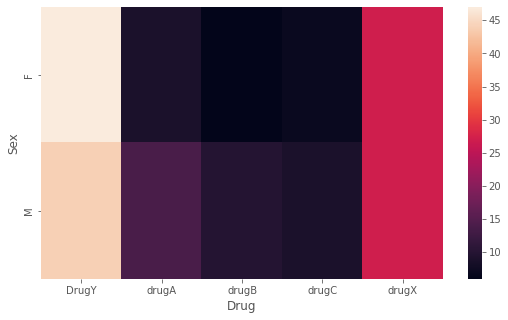

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(pd.crosstab(df['Sex'], df['Drug']))

A partir del gráfico de calor podemos inferir que la droga Y fue recetada, en mayor medida, en mujeres; la A, en varones; la B, en varones y la C y la X casi en igual proporción.

### Presión arterial y droga recetada: 

Seguidamente, analizamos la relación entre **presión arterial** y **droga recetada**: 

In [ ]:
pd.crosstab(df['Sex'], df['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Sex,,,,,
F,47,9,6,7,27
M,44,14,10,9,27


Graficamos esta relación: 

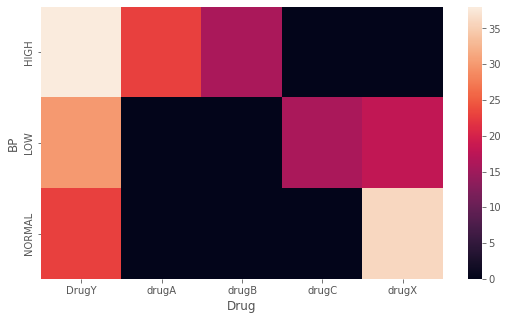

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(pd.crosstab(df['BP'], df['Drug']))

- A partir del gráfico de calor podemos inferir que la droga Y fue 
recetada, en mayor medida, en pacientes con presión arterial alta y en menor medida a pacientes con presión arterial normal. 

- La A, en mayor medida en pacientes con presión arterial alta y en menor medida en pacientes con presión arterial baja y normal. 

- La B, en mayor medida en pacientes con presión arterial alta y en menor medida en pacientes con presión arterial baja y normal. 

- La C, en mayor medida en pacientes con presión arterial baja y en menor medida en pacientes con presión arterial alta y normal.  

- La X, en mayor medida en pacientes con presión arterial normal y en menor medida en pacientes con presión arterial alta.

### Colesterol y droga recetada: 

A continuación, se presenta el análisis entre **colesterol** y **droga recetada**: 

In [ ]:
pd.crosstab(df['Cholesterol'], df['Drug'])

Drug,DrugY,drugA,drugB,drugC,drugX
Cholesterol,,,,,
HIGH,47,12,8,16,20
NORMAL,44,11,8,0,34


Se presenta la relación entre las variables de manera gráfica: 

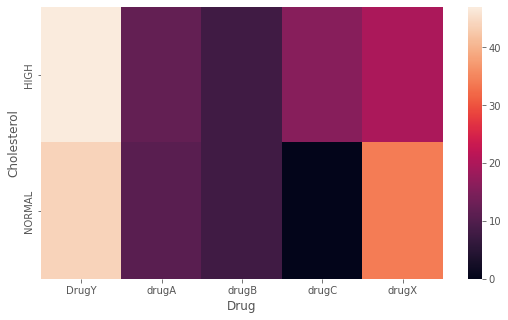

In [ ]:
plt.figure(figsize=(9,5))
sns.heatmap(pd.crosstab(df['Cholesterol'], df['Drug']))

A partir del gráfico podemos inferir que las drogas Y, A y B fueron recetadas casi indistintamente entre pacientes con colesterol alto y normal; que la C se recetó en mayor medida en pacientes con colesterol alto y la X, en pacientes con colesterol normal.

### Proporción de sodio y droga recetada:

Finalmente, indagamos la relación entre proporción de sodio a potasio y droga: 

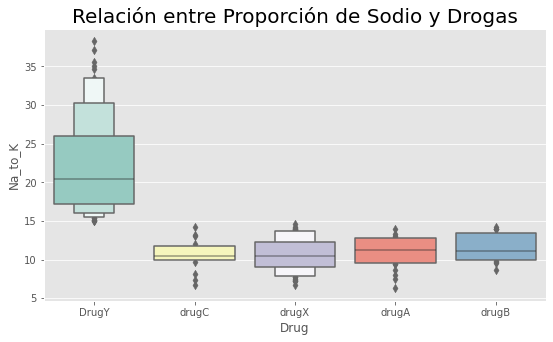

In [ ]:
plt.figure(figsize=(9,5))
sns.boxenplot(x = df['Drug'], y = df['Na_to_K'], palette = 'Set3')
plt.title('Relación entre Proporción de Sodio y Drogas', fontsize = 20, fontweight = 30)
plt.show()

A partir del gráfico podemos inferir que para pacientes con proporciones más elevadas se receta la droga Y.

El resto de las drogas son recetas, por lo general, a pacientes con proporciones cercanas a 10.

## 3. Análisis multivariado

Habiendo indagado la relación bivariada entre variables, se procede a analizar la relación entre conjuntos de variables. 

### Edad, proporción de sodio y drogra recetada: 

Se analiza así la relación entre **edad**, **proporción de sodio** y **droga recetada**:

<Figure size 1440x960 with 0 Axes>

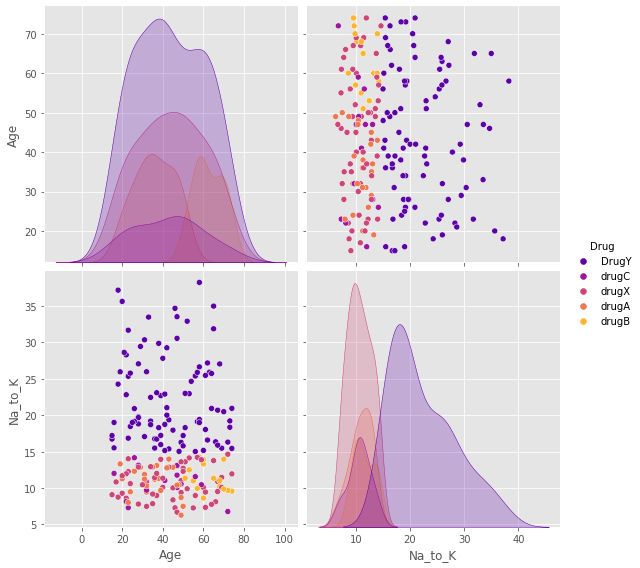

In [ ]:
plt.figure(dpi = 120,figsize= (12,8))
sns.pairplot(df, hue = 'Drug', palette = 'plasma', height=4, aspect= 1)
plt.show()

Se observa que la mayor variabilidad se registra en la Droga Y, viendose mayor concentración de casos en la Droga B respecto a la edad y el potasio según el sodio en sangre.

### Sexo, proporción de sodio y droga recetada: 

Se analiza, también, la relación entre **droga recetada**, **proporción de potasio** y **sexo**: 

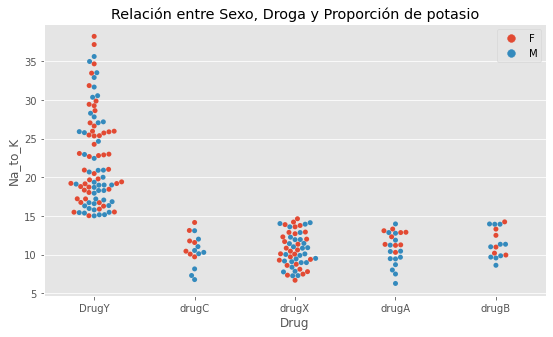

In [ ]:
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",hue="Sex",data = df)
plt.legend()
plt.title("Relación entre Sexo, Droga y Proporción de potasio")
plt.show()

Así, puede notarse que el sexo no interviene en la relación: ambos sexos reciben mayor cantidad de recetas de droga X y droga Y. Esta distinción puede explicarse observando su proporción de potasio, a mayor potasio reciben droga Y y a menor potasio reciben droga X. 


## Algoritmos de clasificación

Habiendo indagado las distintas relaciones entre las variables, pasamos a proponer modelos de clasificación de los pacientes. 

En principio, modificamos los datos pasandolos a dummys: 

In [ ]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX
0,23,25.355,0,0,0,0,0,0,0,0
1,47,13.093,1,1,0,0,0,0,1,0
2,47,10.114,1,1,0,0,0,0,1,0
3,28,7.798,0,0,1,0,0,0,0,1
4,61,18.043,0,1,0,0,0,0,0,0


Seguidamente, eliminamos la variable a predecir y definimos la variable target: 

In [ ]:
X = df_dummy.drop('Drug_drugX', axis=1) 
y = df_dummy.Drug_drugX 

Así, pasamos a dividir el df entre conjunto de datos para entrenar y conjunto de datos para testear. 

Definimos un 20% de datos para test y un 80% para train: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)


x_train shape: (160, 9)
x_test shape: (40, 9)
y_train shape: (160, 1)
y_test shape: (40, 1)


A continuación, vamos a probar **cuatro modelos de clasificación** y vamos a comparar las métricas resultantes. 

Creamos dos objetos para alojar las métricas resultantes y poder compararlas.

In [ ]:
result_dict_train = {}
result_dict_test = {}

### Clasificación por árboles de decisión

Avanzamos creando el modelo: 

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state = 42)

Entrenamos el modelo: 

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Chequeamos la predicción en los dos df, train y test: 

In [ ]:
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 
X_test.head(3)

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC
95,36,11.424,1,1,0,1,0,0,0
15,16,15.516,0,0,0,1,0,0,0
30,18,8.750,0,0,1,1,0,0,0


Finalmente obtenemos las métricas de evaluación de los dos df: 

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.925
% de aciertos sobre el set de evaluación: 0.85


#### Accuracy obtenido: 85%

Alojamos los valores alcanzados:

In [ ]:
result_dict_test["Arboles Default Test Score"] = accuracy_score(y_test, y_test_pred)

### Clasificación por KNN


Habiendo testeado los datos con la clasificación por arboles de decisión, probaremos este método que busca clasificar los datos según puntos de cercanía. 

Utilizamos los conjuntos de datos creados previamente, y armamos el modelo: 

In [ ]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

KNeighborsClassifier()

In [ ]:
print("% de aciertos sobre el set de entrenamiento:",np.mean(accuracies))
print("% de aciertos sobre el set de evaluación:",knn.score(X_test,y_test))

% de aciertos sobre el set de entrenamiento: 0.7125
% de aciertos sobre el set de evaluación: 0.75


#### Accuracy obtenido: 75%

Alojamos los valores alcanzados:

In [ ]:
result_dict_test["KNN Default Test Score"] = knn.score(X_test,y_test)

### Random forest


Esta técnica combina distintos modelos de árboles de decisión. Se considera que, dado que el objetivo de la empresa es conocer cuáles son los pacientes que reciben cada tipo de droga y **no predecir** cuál recibirán, es un método que resulta de utilidad. 

Nuevamente, se emplean los conjuntos de datos de entrenamiento y test previamente definidos y se construye el algoritmo. 

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(random_state=42)

Se evalúan los resultados alcanzados: 

In [ ]:
print("% de aciertos sobre el set de entrenamiento:",np.mean(accuracies))
print("% de aciertos sobre el set de evaluación:",rfc.score(X_test,y_test))

% de aciertos sobre el set de entrenamiento: 0.99375
% de aciertos sobre el set de evaluación: 1.0


#### Accuracy obtenido: 100%

Alojamos los valores alcanzados:

In [ ]:
result_dict_test["Random Forest Default Test Score"] = rfc.score(X_test,y_test)

### SVM: Máquinas de soporte vectorial

Finalmente, se prueba este último algoritmo que se fundamenta en la construcción de hiperplanos de segmentación. 

Se utilizan los conjuntos de datos previamente definidos: 

In [ ]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVC(random_state=42)

Se evalúan los resultados alcanzados: 

In [ ]:
print("% de aciertos sobre el set de entrenamiento:",np.mean(accuracies))
print("% de aciertos sobre el set de evaluación:",svc.score(X_test,y_test))

% de aciertos sobre el set de entrenamiento: 0.73125
% de aciertos sobre el set de evaluación: 0.725


#### Accuracy obtenido: 73%

Alojamos los valores alcanzados:

In [ ]:
result_dict_test["SVM Default Test Score"] = svc.score(X_test,y_test)

## Conclusiones

Habiendo evaluado los distintos algoritmos de clasificación, evaluamos los puntajes alcanzados en el **porcentaje de casos acertados** sobre el conjunto de datos testing:

In [ ]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Arboles Default Test Score,0.850
KNN Default Test Score,0.750
Random Forest Default Test Score,1.000
SVM Default Test Score,0.725


Así, podemos observar que la mejor clasificación se alcanzó mediante la técnica de Random Forest. 

Si bien estos valores podrían dar cuenta de cierto overfitting, se observa que la segunda mejor métrica corresponde a la de arboles de decisión, quedando en evidencia que estos dos tipos de algortimos son los que presentan el mejor desempeño para clasificar los datos bajo análisis. 

Instalamos el paquete Yellowbrick

In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Utilizamos el método Elbow

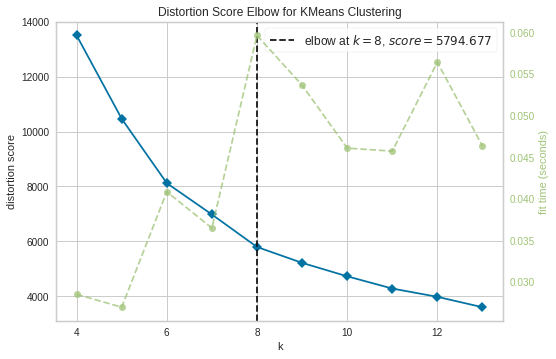

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,14))
visualizer.fit(X)  
visualizer.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.49889816794069775
Para n_clusters = 3 El promedio del score de silhouette es:  0.4091331836494977
Para n_clusters = 4 El promedio del score de silhouette es:  0.4133139174440106
Para n_clusters = 5 El promedio del score de silhouette es:  0.4092065637390806
Para n_clusters = 6 El promedio del score de silhouette es:  0.40257743503312843
Para n_clusters = 7 El promedio del score de silhouette es:  0.4107946665401506
Para n_clusters = 8 El promedio del score de silhouette es:  0.4015114936987125
Para n_clusters = 9 El promedio del score de silhouette es:  0.3988519166576653


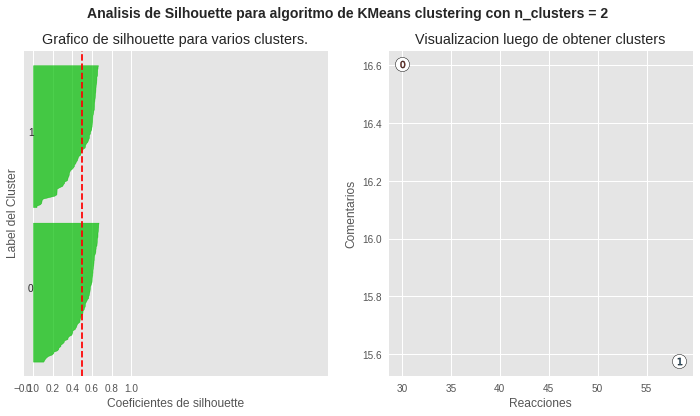

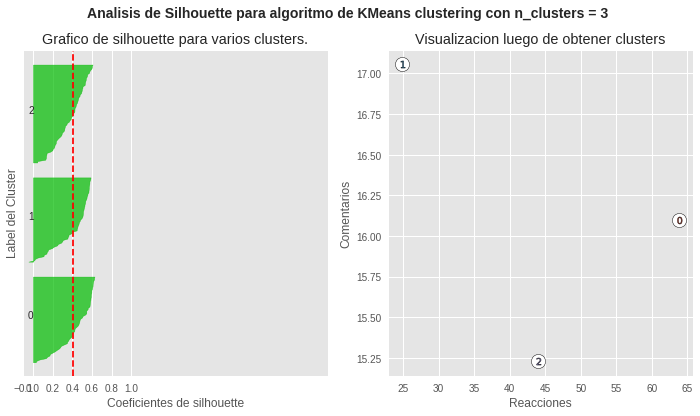

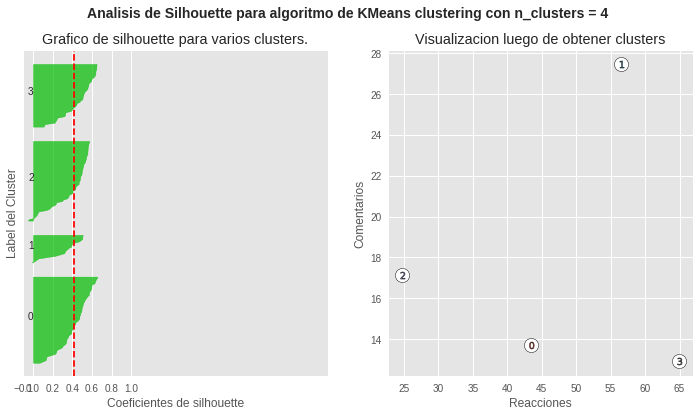

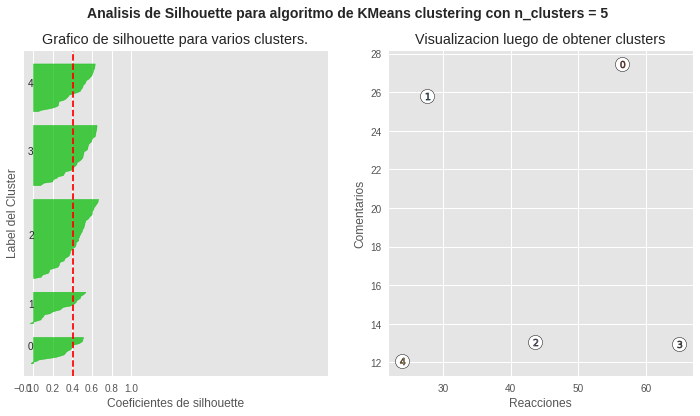

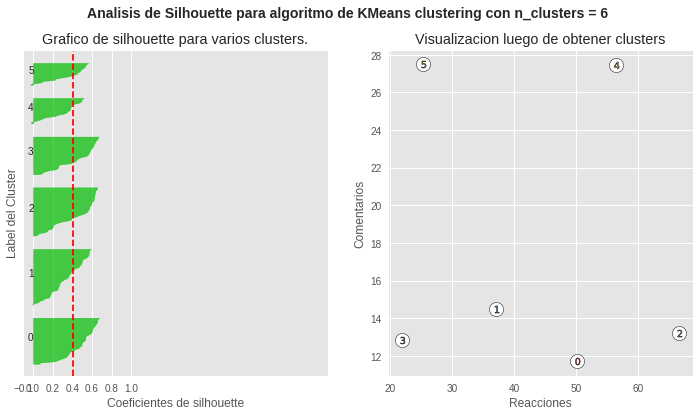

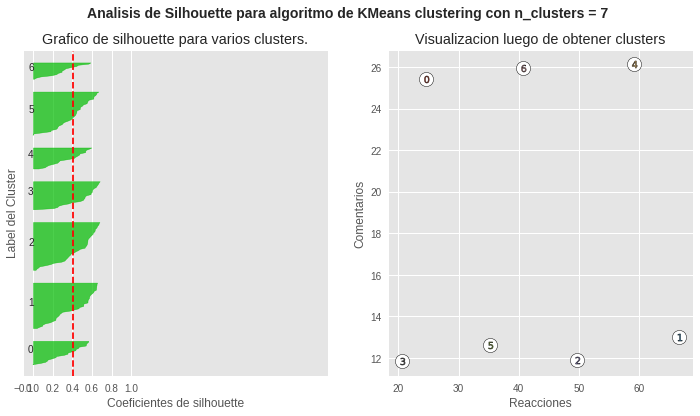

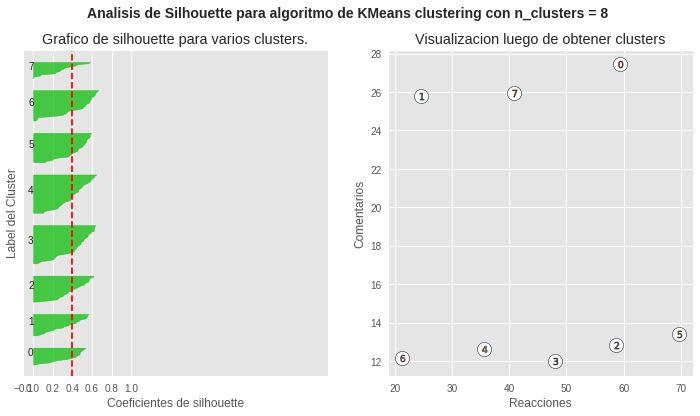

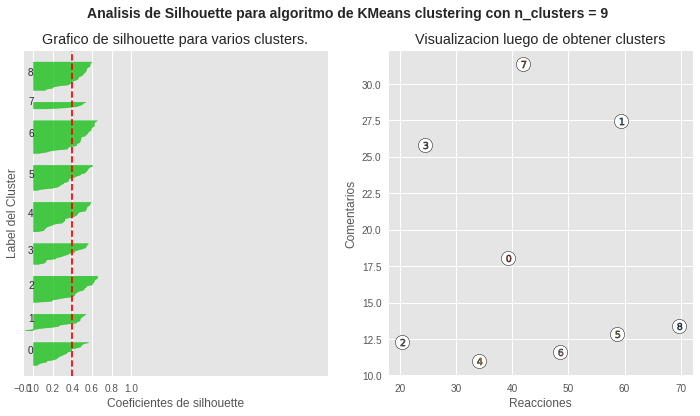

In [ ]:
for n_clusters in range(2, 10):     #Creamos un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)
    #El 1 subplot es para el score de silhouette 
    #El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 3]) # para nuestro caso lo vamos a dejar en este rango. El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10]) #Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)     #El score de silhouette_score da el promedio de todos los valores 
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,"El promedio del score de silhouette es: ", silhouette_avg) #Calculamos el score de silhouette para cada muestra 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters): #Agregamos los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos 
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() #Ordenamos
        size_cluster_i = ith_cluster_silhouette_values.shape[0] #Vemos el tamaño de clusters
        y_upper = y_lower + size_cluster_i 
        ax1.fill_betweenx(np.arange(y_lower, y_upper),  0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7) #Etiquetamos las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        #Calculamos el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10 
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    #La linea vertical es para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    #2 graficamos mostrando los clusters formados 
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) #definimos
    centers = clusterer.cluster_centers_     #Etiquetamos a los clusters   
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k') #Dibujamos en color blanco los centroides de los clusters 
    # Enumeramos los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Reacciones")
    ax2.set_ylabel("Comentarios")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Hypertuning Parametros


Seleccion manual

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

Accuracy para Modelo 1 = 1.0
Accuracy para Modelo 2 = 1.0
Accuracy para Modelo 3 = 1.0


Grid Search

In [ ]:
params_grid = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,6],
        'criterion':['entropy','gini']
        }

In [ ]:
# tiempo de ejecución (20 seg)
grid_cv = GridSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
print("Mejores Parametros", grid_cv.best_params_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'colsample_bytree': 0.8, 'criterion': 'entropy', 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Accuracy del modelo = 1.0


In [ ]:
# tiempo de ejecució 7 seg
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0.5, 'criterion': 'gini', 'colsample_bytree': 0.8}
Accuracy del modelo = 1.0


Halving Grid Search

In [ ]:
# tiempo de ejecución 20 seg
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'colsample_bytree': 0.8, 'criterion': 'gini', 'gamma': 1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 0.8}
Accuracy del modelo = 1.0


Halving Randomized Search

In [ ]:
# tiempo de ejecución 13 seg
halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 0.5, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Accuracy del modelo = 1.0


Halving Randomized Search

In [ ]:
# tiempo de ejecución 13 seg
halving_cv = HalvingRandomSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 1, 'criterion': 'entropy', 'colsample_bytree': 0.8}
Accuracy del modelo = 1.0
